## Import Library needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier


# import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline

import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import Word2Vec, Phrases
from gensim.models.keyedvectors import KeyedVectors

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers.embeddings import Embedding

from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences




In [2]:
pd.options.display.max_colwidth = 1000
train_data = pd.read_csv("train.csv", encoding='ISO-8859-1')
train_data

ItemID  Sentiment  \
0           1          0   
1           2          0   
2           3          1   
3           4          0   
4           5          0   
...       ...        ...   
99984   99996          0   
99985   99997          1   
99986   99998          0   
99987   99999          1   
99988  100000          1   

                                                                                                                                    SentimentText  
0                                                                                                        is so sad for my APL friend.............  
1                                                                                                                I missed the New Moon trailer...  
2                                                                                                                         omg its already 7:30 :O  
3                      .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...  
4                                                                                                    i think mi bf is cheating on me!!!       T_T  
...                                                                                                                                           ...  
99984                                                              @Cupcake  seems like a repeating problem   hope you're able to find something.  
99985  @cupcake__ arrrr we both replied to each other over different tweets at the same time  , i'll see you then, Duno where the hell Kateyy is!  
99986                                                                                                              @CuPcAkE_2120 ya i thought so   
99987                                                                               @Cupcake_Dollie Yes. Yes. I'm glad you had more fun with me.   
99988                                                                                                             @cupcake_kayla haha yes you do   

[99989 rows x 3 columns]

## Part 1. Simple EDA & Visualize  Data


In [3]:
print("Summary statistics of numerical features : \n", train_data.describe())

print("\nTotal number of reviews: ",len(train_data))

print("\nPercentage of reviews with Negative sentiment : {:.2f}%"\
      .format(train_data[train_data['Sentiment']==0]["SentimentText"].count()/len(train_data)*100))
print("\nPercentage of reviews with Positive sentiment : {:.2f}%"\
      .format(train_data[train_data['Sentiment']==1]["SentimentText"].count()/len(train_data)*100))

Summary statistics of numerical features : 
               ItemID     Sentiment
count   99989.000000  99989.000000
mean    50005.110042      0.564632
std     28865.894393      0.495808
min         1.000000      0.000000
25%     25009.000000      0.000000
50%     50006.000000      1.000000
75%     75003.000000      1.000000
max    100000.000000      1.000000

Total number of reviews:  99989

Percentage of reviews with Negative sentiment : 43.54%

Percentage of reviews with Positive sentiment : 43.54%


## Visualize the tweets

Negative Wordcloud


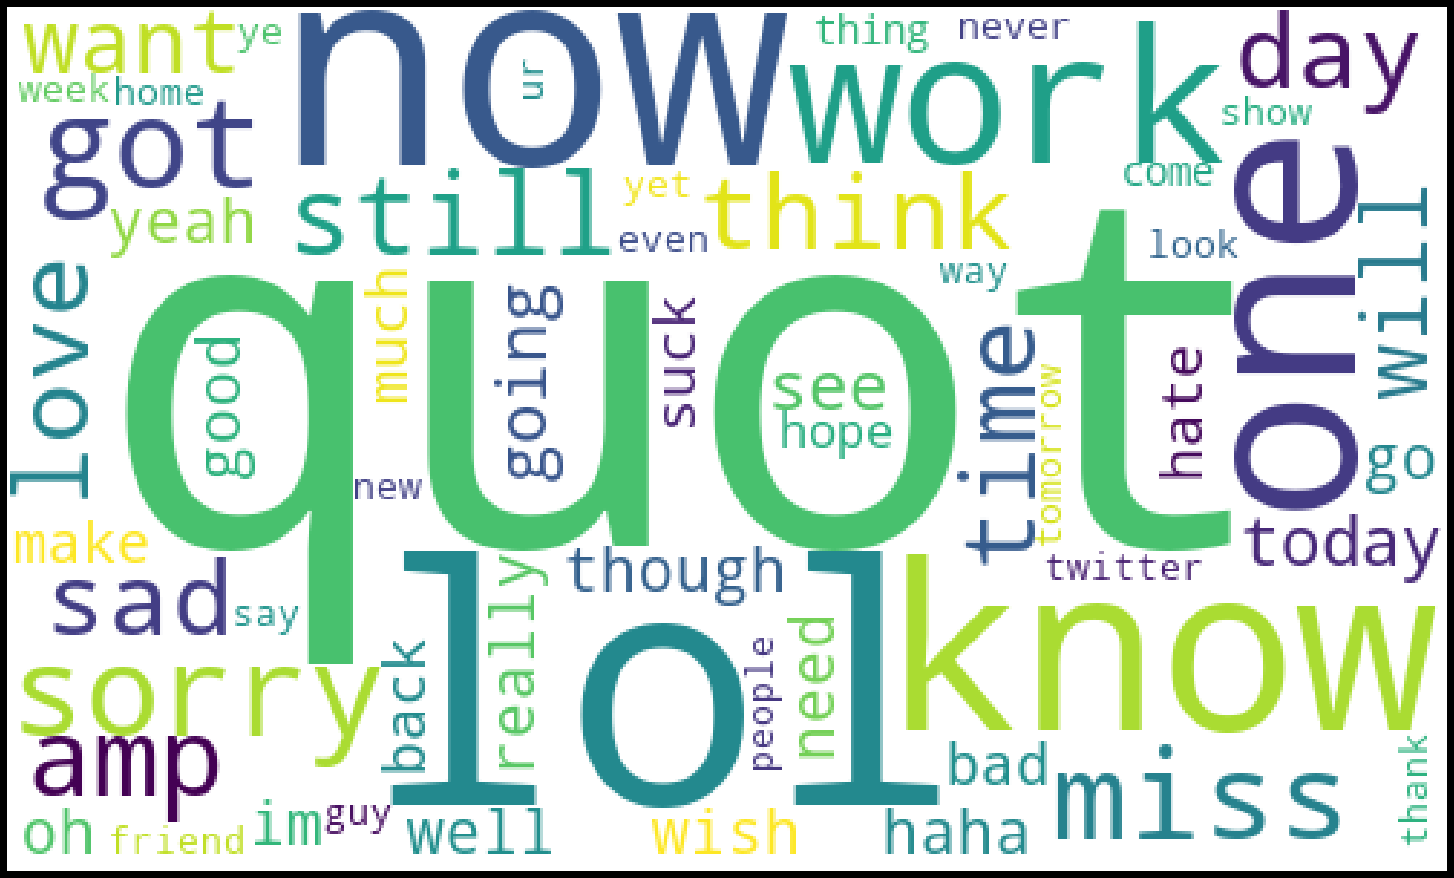

-----------------------------------------------------------------------------------------------------------------
Positif Wordcloud


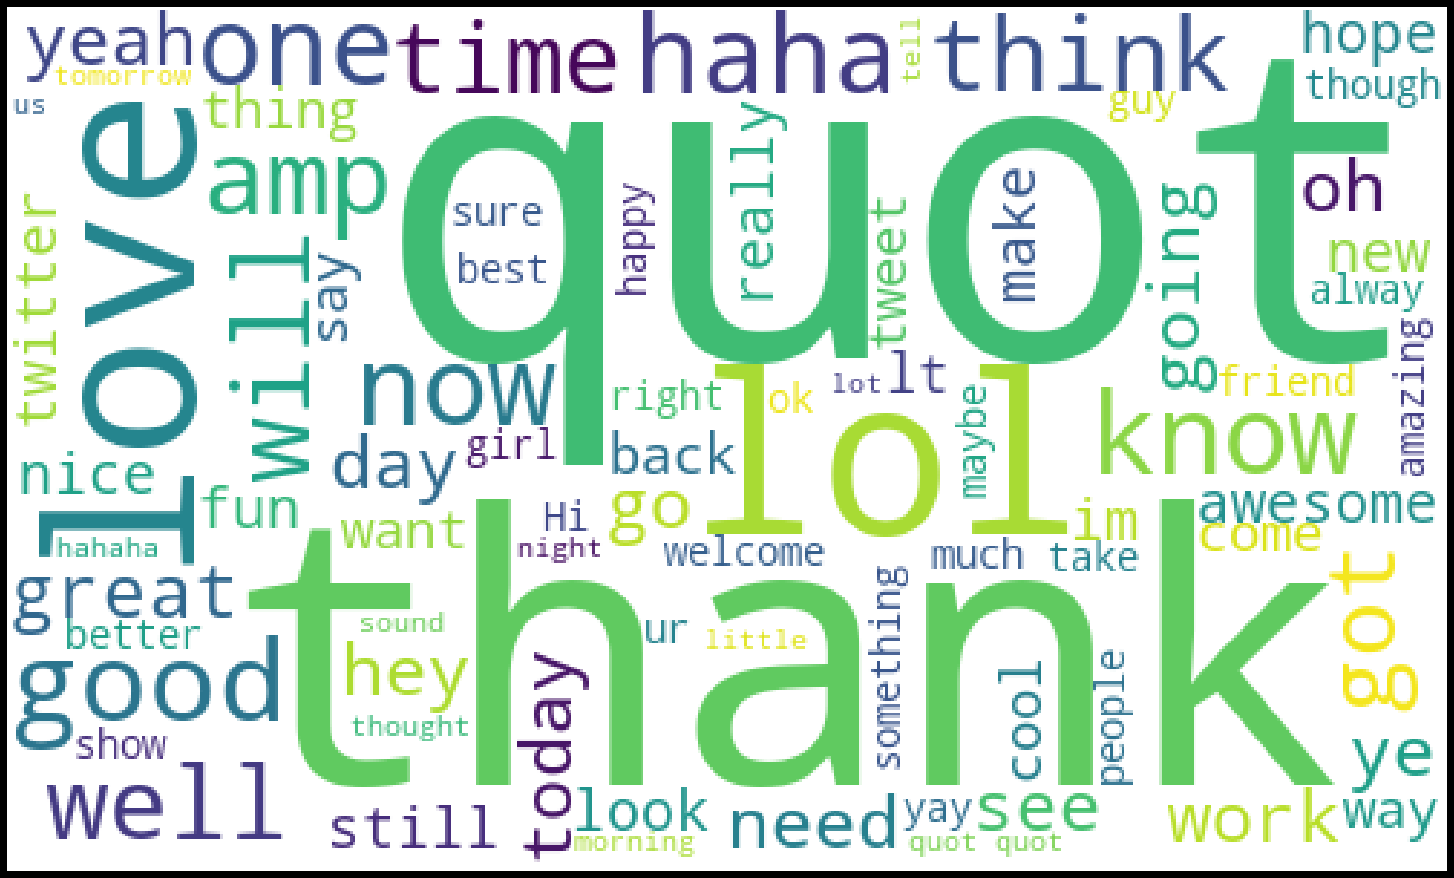

In [4]:
stopwords = set(STOPWORDS) 

print('Negative Wordcloud')
wordcloud = WordCloud(width=500, height=300, 
                      background_color ='white', 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(' '.join(train_data[train_data['Sentiment']==0]['SentimentText']))
plt.figure( figsize=(20,20), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

print('-----------------------------------------------------------------------------------------------------------------')

print('Positif Wordcloud')
wordcloud = WordCloud(width=500, height=300, 
                      background_color ='white', 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(' '.join(train_data[train_data['Sentiment']==1]['SentimentText']))

plt.figure( figsize=(20,20), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Find Emoticon
in this part, we want know what emoticons are used in dataset, after that we replace the Sad Emoticon to word **"Sad Emoticon"** and the Happy Emoticon to word **"Happy Emoticon"**

In [5]:
#we need library regex or import re
import re
tweets_text = train_data.SentimentText.str.cat()
emos = set(re.findall(r" ([xX:;][-']?.) ",tweets_text))
emos_count = []
for emo in emos:
    emos_count.append((tweets_text.count(emo), emo))
sorted(emos_count,reverse=True)

[(3281, ':/'),
 (2874, 'x '),
 (2626, ': '),
 (1339, 'x@'),
 (1214, 'xx'),
 (1162, 'xa'),
 (984, ';3'),
 (887, 'xp'),
 (842, 'xo'),
 (713, ';)'),
 (483, 'xe'),
 (431, ';I'),
 (353, ';.'),
 (254, 'xD'),
 (251, 'x.'),
 (245, '::'),
 (234, 'X '),
 (217, ';t'),
 (209, ';s'),
 (185, ':O'),
 (176, ':3'),
 (166, ';D'),
 (159, ":'"),
 (157, 'XD'),
 (146, 'x3'),
 (142, ':p'),
 (126, ":'("),
 (118, ':@'),
 (117, 'xh'),
 (117, ':S'),
 (109, 'xm'),
 (104, ';p'),
 (104, ';-)'),
 (92, ':|'),
 (91, 'x,'),
 (89, ';P'),
 (76, 'xd'),
 (75, ';o'),
 (75, ';d'),
 (71, ':o'),
 (65, 'XX'),
 (63, ':L'),
 (59, 'Xx'),
 (59, ':1'),
 (58, ':]'),
 (57, ':s'),
 (56, ':0'),
 (54, 'XO'),
 (44, ';;'),
 (43, ';('),
 (38, ':-D'),
 (37, 'xk'),
 (36, 'XT'),
 (35, 'x?'),
 (35, 'x)'),
 (34, 'x2'),
 (33, ';/'),
 (32, 'x:'),
 (32, ':\\'),
 (31, 'x-'),
 (27, 'Xo'),
 (27, 'XP'),
 (27, ':-/'),
 (26, ':-P'),
 (25, ':*'),
 (23, 'xX'),
 (22, ":')"),
 (17, 'xP'),
 (16, ':['),
 (16, ':-p'),
 (14, 'x]'),
 (14, 'XM'),
 (13, ':-O'),
 (1

In [6]:
HAPPY_EMO = r" ([xX;:]-?[dD)]|:-?[\)]|[;:][pP]) "
SAD_EMO = r" (:'?[/|\(]) "
happy_emoticon=set(re.findall(HAPPY_EMO, tweets_text))
sad_emoticon=set(re.findall(SAD_EMO, tweets_text))

print("Happy emoticons:", happy_emoticon)
print("Sad emoticons:", sad_emoticon)

Happy emoticons: {':d', ':p', ';D', ':-D', ';-D', ':D', 'xD', 'xd', 'XD', ';-)', ';p', 'x)', ';)', ';P', ';d'}
Sad emoticons: {':|', ':/', ":'(", ':('}


In [7]:
happy_emoticon = {':p', 'XD', ';-D', 'xD', ';D', ';d', ';)', 'xd', ':d', ';P', ':-D', ':D', 'x)', ';-)', ';p'}
sad_emoticon={":'(", ':/', ':|',':('}

## Most used words
What we are going to do next is to define a function that will show us top words, so we may fix things before running our learning algorithm. This function takes as input a text and output words sorted according to their frequency, starting with the most used word.

In [8]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.tokenize import word_tokenize

# Uncomment this line if you haven't downloaded punkt before
# or just run it as it is and uncomment it if you got an error.
#nltk.download('punkt')
def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(tokens)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

In [9]:
most_used_words(train_data.SentimentText.str.cat())[:100]

There is 133899 different words


['@',
 '!',
 '.',
 'I',
 ',',
 'to',
 'the',
 'you',
 '?',
 'a',
 'it',
 'i',
 '...',
 ';',
 'and',
 '&',
 'my',
 'for',
 'is',
 'that',
 "'s",
 "n't",
 'in',
 'of',
 'me',
 'have',
 'on',
 'quot',
 "'m",
 'so',
 ':',
 'but',
 '#',
 'do',
 'was',
 'be',
 'not',
 'your',
 'are',
 'just',
 'with',
 'like',
 '-',
 'at',
 'too',
 'get',
 'good',
 'u',
 'up',
 'know',
 'all',
 'this',
 'now',
 'no',
 'we',
 'out',
 ')',
 'love',
 'can',
 '(',
 'what',
 'one',
 'will',
 'lol',
 'go',
 'about',
 'did',
 "'ll",
 'got',
 'amp',
 'there',
 'day',
 'http',
 'see',
 "'re",
 'if',
 'time',
 'they',
 'think',
 'as',
 'when',
 'from',
 'You',
 'It',
 'going',
 'really',
 'am',
 'work',
 'well',
 'had',
 'would',
 'how',
 'he',
 'here',
 'some',
 'thanks',
 'back',
 'im',
 'haha',
 'or']

Stop words
What we can see is that stop words are the most used, but in fact they don't help us determine if a tweet is negative/positif, however, they are consuming memory and they are making the learning process slower, so we really need to get rid of them.

In [10]:
from nltk.corpus import stopwords

#nltk.download("stopwords")

mw = most_used_words(train_data.SentimentText.str.cat())
most_words = []
for w in mw:
    if len(most_words) == 1000:
        break
    if w in stopwords.words("english"):
        continue
    else:
        most_words.append(w)

There is 133899 different words


In [11]:
sorted(most_words)

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '(',
 ')',
 '*',
 '*hugs*',
 '*sigh*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '/',
 '1',
 '10',
 '100',
 '12',
 '1st',
 '2',
 '20',
 '2nd',
 '3',
 '30',
 '30SECONDSTOMARS',
 '4',
 '5',
 '6',
 '7',
 '8',
 ':',
 ';',
 '=',
 '?',
 '@',
 'A',
 'AND',
 'Ah',
 'AlexAllTimeLow',
 'All',
 'Also',
 'Alyssa_Milano',
 'Am',
 'And',
 'Are',
 'As',
 'At',
 'Aw',
 'Awesome',
 'Aww',
 'Awww',
 'BSB',
 'Birthday',
 'But',
 'Ca',
 'Can',
 'Chris',
 'Come',
 'Congrats',
 'Cool',
 'D',
 'DM',
 'DO',
 'Damn',
 'Day',
 'Did',
 'Do',
 'Enjoy',
 'FF',
 'Follow',
 'FollowFriday',
 'For',
 'Friday',
 'Get',
 'Glad',
 'Go',
 'God',
 'Good',
 'Got',
 'Great',
 'Had',
 'Haha',
 'Happy',
 'Have',
 'He',
 'Hello',
 'Hey',
 'Hi',
 'Hope',
 'How',
 'I',
 'IS',
 'IT',
 'If',
 'Im',
 'In',
 'Is',
 'It',
 'Its',
 'July',
 'June',
 'Just',
 'Keep',
 'LA',
 'LMAO',
 'LOL',
 'LOVE',
 'Let',
 'Like',
 'Lol',
 'London',
 'Love',
 'ME',


## Part 2. Text Preprocessing (Cleansing data)
The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.

remove non-character such as digits and symbols <br>
convert to lower case <br>
remove stop words such as "the" and "and" if needed <br>
convert to root words by stemming if needed <br>etc

In [12]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import numpy as np
import re
import string

In [13]:
def stem_lemmatize_tokenize(text):
    stemmer = SnowballStemmer("english")
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(stemmer.stem(token)) for token in word_tokenize(text.lower())]

In [14]:
def replace_emoticon(sentence):
    global happy_emoticon
    global sad_emoticon

    words = sentence.split()
    for word in words:
        if word in happy_emoticon:
            sentence = sentence.replace(word, "happyemoticon")
        elif word in sad_emoticon:
            sentence = sentence.replace(word, "sademoticon")
    return sentence

In [15]:
train_data['SentimentText']=train_data['SentimentText'].apply(lambda x: replace_emoticon(x))

#replace(emoji)
import emoji
print(emoji.demojize('Python is 👍'))
train_data['SentimentText']=train_data['SentimentText'].apply(lambda x: emoji.demojize(x))

Python is :thumbs_up:


In [16]:
train_data

ItemID  Sentiment  \
0           1          0   
1           2          0   
2           3          1   
3           4          0   
4           5          0   
...       ...        ...   
99984   99996          0   
99985   99997          1   
99986   99998          0   
99987   99999          1   
99988  100000          1   

                                                                                                                                    SentimentText  
0                                                                                                        is so sad for my APL friend.............  
1                                                                                                                I missed the New Moon trailer...  
2                                                                                                                         omg its already 7:30 :O  
3                      .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...  
4                                                                                                    i think mi bf is cheating on me!!!       T_T  
...                                                                                                                                           ...  
99984                                                              @Cupcake  seems like a repeating problem   hope you're able to find something.  
99985  @cupcake__ arrrr we both replied to each other over different tweets at the same time  , i'll see you then, Duno where the hell Kateyy is!  
99986                                                                                                              @CuPcAkE_2120 ya i thought so   
99987                                                                               @Cupcake_Dollie Yes. Yes. I'm glad you had more fun with me.   
99988                                                                                                             @cupcake_kayla haha yes you do   

[99989 rows x 3 columns]

In [17]:
train_data['Clean_SentimentText']=train_data['SentimentText'].apply(lambda x: x.lower()) #case folding
train_data['Clean_SentimentText'] = train_data['Clean_SentimentText'].str.replace(r"@[a-zA-Z0-9_]* ", "") #user
train_data['Clean_SentimentText'] = train_data['Clean_SentimentText'].str.replace("#", "")# Keeping only the word after the #
train_data['Clean_SentimentText'] = train_data['Clean_SentimentText'].str.replace(r"[-\.\n]", "")
train_data['Clean_SentimentText'] = train_data['Clean_SentimentText'].str.replace(r"&\w+;", "")# Removing HTML garbage
train_data['Clean_SentimentText'] = train_data['Clean_SentimentText'].str.replace(r"https?://\S*", "")# Removing links
train_data['Clean_SentimentText'] = train_data['Clean_SentimentText'].apply(lambda x: re.sub(r"\d+", "", x)) #menghapus angka
train_data['Clean_SentimentText'] = train_data['Clean_SentimentText'].apply(lambda x: x.translate(str.maketrans("","",string.punctuation))) #mengahpus simbol
train_data['Clean_SentimentText'] = train_data['Clean_SentimentText'].str.replace(r"(.)\1+", r"\1\1")# replace repeated letters with only two occurence # heeeelllloooo => heelloo
train_data['Clean_SentimentText'] = train_data['Clean_SentimentText'].apply(lambda x: stem_lemmatize_tokenize(x))

In [18]:
def token2sentence(x):
    word_list=''
    for word in x:
        word_list=word_list+" "+word
    return word_list

train_data['Clean_SentimentText']=train_data['Clean_SentimentText'].apply(lambda x: token2sentence(x))
train_data.head()

ItemID  Sentiment  \
0       1          0   
1       2          0   
2       3          1   
3       4          0   
4       5          0   

                                                                                                                          SentimentText  \
0                                                                                              is so sad for my APL friend.............   
1                                                                                                      I missed the New Moon trailer...   
2                                                                                                               omg its already 7:30 :O   
3            .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...   
4                                                                                          i think mi bf is cheating on me!!!       T_T   

                                                                                Clean_SentimentText  
0                                                                       is so sad for my apl friend  
1                                                                       i miss the new moon trailer  
2                                                                                  omg it alreadi o  
3   omgaga im soo im gunna cri ive been at this dentist sinc i wa supos just get a crown put on min  
4                                                                   i think mi bf is cheat on me tt

In [19]:
#keep new variabel
sentiments = train_data['Sentiment']
tweets = train_data['Clean_SentimentText']

## Part 3. Bag of Words and TFIDF
The goal of this project is to classify the reviews into positive and negative sentiment. There are two main steps involved. First, we need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.

One common approach of word embedding is frequency based embedding such as Bag of Words (BoW) model. BoW model learns a vocubulary list from a given corpus and represents each document based on some counting methods of words. In this part, we will explore the model performance of using BoW with supervised learning algorithms. Here's the workflow in this part.

Step 1 : Preprocess raw reviews to cleaned reviews <br>
Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn <br>
Step 3 : Transform review text to numerical representations (feature vectors) <br>
Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.) <br>


### 3.1. Word Weighting using CountVectorizer (Bag of Words)

In [20]:
#BOG
countVect = CountVectorizer() 
X_countVect = countVect.fit_transform(tweets)
print("Number of features : %d \n" %len(countVect.get_feature_names()))
print("Show some feature names : \n", countVect.get_feature_names()[::1000])

Number of features : 49817 

Show some feature names : 
 ['aa', 'ajcurran', 'aningherda', 'atlstl', 'baroqu', 'billybut', 'bragg', 'cach', 'chargerr', 'cmoni', 'courthord', 'dayenjoy', 'disini', 'dwighthoward', 'estpm', 'fend', 'freight', 'gimmic', 'guessenjoy', 'hedgehog', 'horseback', 'inaug', 'jajaaww', 'kathrynyo', 'lamesauc', 'loea', 'man', 'metropc', 'morrowind', 'nebodi', 'nowhuh', 'oppotunitiesfor', 'pear', 'poke', 'punetraff', 'regardshmm', 'rounder', 'screw', 'showign', 'socap', 'startinq', 'sutra', 'thailandsuck', 'tk', 'tsp', 'unexplain', 'vivr', 'whasgood', 'wreak', 'yougoodnight']


In [21]:
# Split data into training set and validation BOW
X_train, X_test, y_train, y_test = train_test_split(X_countVect,sentiments, \
                                                    test_size=0.05, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))

Load 94989 training examples and 5000 validation examples. 



In [22]:
def modelEvaluation(y_pred):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, y_pred)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, y_pred)))
    print("\nClassification report : \n", metrics.classification_report(y_test, y_pred))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, y_pred))

In [23]:
# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
print(cross_val_score(mnb,X_countVect, sentiments,cv=10))

# Evaluate the model on validaton set
y_pred = mnb.predict(X_test)
modelEvaluation(y_pred)

[0.7159716  0.72667267 0.75947595 0.75487549 0.75687569 0.75737574
 0.74947495 0.7549755  0.7529753  0.75295059]

Accuracy on validation set: 0.7634

Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      2172
           1       0.79      0.80      0.79      2828

    accuracy                           0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000


Confusion Matrix : 
 [[1557  615]
 [ 568 2260]]


In [24]:
# Train Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(cross_val_score(lr,X_countVect, sentiments,cv=10))

# Evaluate the model on validaton set
y_pred = lr.predict(X_test)
modelEvaluation(y_pred)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

[0.7279728  0.74657466 0.76157616 0.76107611 0.76877688 0.76567657
 0.75457546 0.75967597 0.75947595 0.75425085]

Accuracy on validation set: 0.7618

Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      2172
           1       0.77      0.83      0.80      2828

    accuracy                           0.76      5000
   macro avg       0.76      0.75      0.75      5000
weighted avg       0.76      0.76      0.76      5000


Confusion Matrix : 
 [[1462  710]
 [ 481 2347]]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
# Look at the top 10 features with smallest and the largest coefficients
feature_names = np.array(countVect.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['inaperfectworld' 'dontyouh' 'sad' 'unfair' 'disconnect' 'poor' 'sadd'
 'pakcricket' 'suck' 'bnp']

Top 10 features with largest coefficients : 
['chuckl' 'musicmonday' 'handsom' 'goodmorn' 'followfriday' 'yey' 'welcom'
 'thatd' 'congratul' 'rockin']


### 3.2. Word Weighting using TF-IDF

In [26]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))

In [27]:
tweets_tfidf=vectorizer.fit_transform(tweets)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(tweets_tfidf, sentiments, test_size=0.05)
print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))

Load 94989 training examples and 5000 validation examples. 



In [29]:
len(X_train[0].toarray().T)

49817

Select a model
When we have our data ready to be processed by ML models, the question we should ask is which model to use?

The answer varies depending on the problem and data, for example, it's known that Naive Bias has proven good efficacy against Text Based Problems.

A good way to choose a model is to try different candidate, evaluate them using cross validation, then chose the best one which will be later tested against our test data.

In [30]:
# Train BernouliNB classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print(cross_val_score(bnb,tweets_tfidf, sentiments,cv=10))

# Evaluate the model on validaton set
y_pred = bnb.predict(X_test)
modelEvaluation(y_pred)

[0.69366937 0.72457246 0.74737474 0.73977398 0.74267427 0.74147415
 0.73687369 0.74457446 0.73977398 0.74034807]

Accuracy on validation set: 0.7372

Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.66      0.68      2135
           1       0.76      0.80      0.78      2865

    accuracy                           0.74      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.74      0.74      0.74      5000


Confusion Matrix : 
 [[1400  735]
 [ 579 2286]]


In [31]:
# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
print(cross_val_score(mnb,tweets_tfidf, sentiments,cv=10))

# Evaluate the model on validaton set
y_pred = mnb.predict(X_test)
modelEvaluation(y_pred)

[0.7219722  0.72857286 0.74547455 0.73727373 0.7429743  0.7409741
 0.73857386 0.73627363 0.73767377 0.73374675]

Accuracy on validation set: 0.7410

Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.58      0.65      2135
           1       0.73      0.86      0.79      2865

    accuracy                           0.74      5000
   macro avg       0.75      0.72      0.72      5000
weighted avg       0.74      0.74      0.73      5000


Confusion Matrix : 
 [[1228  907]
 [ 388 2477]]


In [32]:
# Train Logistic Regression classifier
lr = LogisticRegression()
mnb.fit(X_train, y_train)
print(cross_val_score(mnb,tweets_tfidf, sentiments,cv=10))

# Evaluate the model on validaton set
y_pred = mnb.predict(X_test)
modelEvaluation(y_pred)

[0.7219722  0.72857286 0.74547455 0.73727373 0.7429743  0.7409741
 0.73857386 0.73627363 0.73767377 0.73374675]

Accuracy on validation set: 0.7410

Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.58      0.65      2135
           1       0.73      0.86      0.79      2865

    accuracy                           0.74      5000
   macro avg       0.75      0.72      0.72      5000
weighted avg       0.74      0.74      0.73      5000


Confusion Matrix : 
 [[1228  907]
 [ 388 2477]]



## Part 4. Word2Vec 
Another common approach of word embedding is prediction based embedding, such as Word2Vec model. In gist, Word2Vec is a combination of two techniques: Continuous Bag of Words (CBoW) and skip-gram model. Both are shallow neural networks which learn weights for word vector representations.

In this part, we will train Word2Vec model to create our own word vector representations using gensim library. Then we fit the feature vectors of the reviews simple LSTM and Bi-LSTM. Here's the workflow of this part.

Step 1 : text to sentences (Word2Vec model takes a list of sentences as inputs) <br>
Step 2 : Create volcabulary list using Word2Vec model <br>
Step 3 : Transform each review into numerical representation by computing average feature vectors of words therein <br>
Step 4 : Embed Word2Vec to simple LSTM architecture


### Creating Volcabulary List using Word2Vec Model
Now we have a set of cleaned and parsed sentences from the training data, we can train our own word evctor representations by sepcifiying the embedding dimension (= length of feature vector)

In [57]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):

    letters_only = re.sub("[^a-zA-Z]", " ", raw_text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [58]:
# nltk.download()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parse each review in the training set into sentences
sentences = []
for review in tweets:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

99633 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['i', 'must', 'think', 'about', 'posit']


## Setup Word2vec

In [63]:
import multiprocessing
from tqdm import tqdm

num_features = 150  #embedding dimension                     
min_word_count = 10                       
context = 10                                                                                          
downsampling = 1e-3 

In [64]:
## CBOW 
cores = multiprocessing.cpu_count()-2
print(cores)
model_ug_cbow = Word2Vec(sentences,sg=0, size=num_features, window=5, min_count=min_word_count,
                         workers=cores, alpha=0.065, min_alpha=0.065)

print("Number of words in the vocabulary list : %d \n" %len(model_ug_cbow.wv.index2word)) #4016 
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", model_ug_cbow.wv.index2word[0:10])

6
Number of words in the vocabulary list : 5169 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['i', 'the', 'to', 'you', 'a', 'it', 'and', 'that', 'my', 'for']


In [65]:
## SkipGram
cores = multiprocessing.cpu_count()-2
model_ug_sg = Word2Vec(sentences,sg=1, size=num_features, window=5, min_count=min_word_count,
                         workers=cores, alpha=0.065, min_alpha=0.065)

print("Number of words in the vocabulary list : %d \n" %len(model_ug_sg.wv.index2word)) #4016 
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", model_ug_sg.wv.index2word[0:10])

Number of words in the vocabulary list : 5169 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['i', 'the', 'to', 'you', 'a', 'it', 'and', 'that', 'my', 'for']


In [66]:
#let check Word "you" based on two model w2v
print(model_ug_cbow['you'],model_ug_sg['you'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[-0.4167139  -0.24449368 -0.49928683  0.16717447  0.30554366  0.81328136
 -0.29245058 -1.4875215   1.1988022  -0.54683053  0.48689386 -0.80612004
 -0.0698193   0.6810416   1.1871133   0.48953247  0.61090034  0.15489621
  0.13657925 -0.73721474  0.18420187  0.09965162  0.36781165  0.26863256
  0.00423671 -0.46461135  0.13904423  0.3249218  -0.09905007  0.08568583
 -0.14301606  1.1281159  -0.48153657 -0.5177221  -0.33433425  0.1074582
 -0.2497854  -0.5555703   0.05128666 -0.43696183  0.4019808   0.67838776
  0.06076555 -0.05755796  0.30932677 -0.67860776  0.2636369   0.1576946
 -0.0550126   0.9155262   0.15503916 -0.21992321  0.10810884  0.40000376
 -0.82789    -0.20452362  0.3921842   0.3986821  -0.7064906   0.22752902
  0.9623633   0.6598294   0.37759236 -0.26247308 -0.69097686  0.51200044
  0.08332646 -0.21367964 -0.3578089  -0.2767782   0.3698516  -0.25415573
 -1.2768946   0.26624903  0.5277753   0.06909208 -0.6265751   0.24127619
 -0.56514597 -0.80385214 -0.32149643 -0.3310007   0.4

In [68]:
#let check Word "you" based on two model w2v
print(model_ug_cbow.wv.most_similar('mail'))
print(model_ug_sg.wv.most_similar('mail'))

[('email', 0.5205764770507812), ('includ', 0.4248761534690857), ('url', 0.4145473837852478), ('address', 0.388217568397522), ('password', 0.37961357831954956), ('websit', 0.3712405562400818), ('gmail', 0.3706371486186981), ('panel', 0.3688333034515381), ('facebook', 0.36614859104156494), ('receiv', 0.3644494414329529)]
[('email', 0.46854734420776367), ('address', 0.44003933668136597), ('postcard', 0.39466196298599243), ('detail', 0.38614392280578613), ('fm', 0.3830834925174713), ('dm', 0.37762823700904846), ('link', 0.375682532787323), ('submit', 0.37295001745224), ('inbox', 0.3703058362007141), ('jailbreak', 0.36605358123779297)]


In [71]:
#save model word2vec
model_ug_cbow.save('w2v_model_ug_cbow.word2vec')
model_ug_sg.save('w2v_model_ug_sg.word2vec')

In [72]:
from gensim.models import KeyedVectors
model_ug_cbow = KeyedVectors.load('w2v_model_ug_cbow.word2vec')
model_ug_sg = KeyedVectors.load('w2v_model_ug_sg.word2vec')

In [73]:
print(len(model_ug_cbow.wv.vocab.keys()))
print(len(model_ug_sg.wv.vocab.keys()))

5169
5169


In [74]:
model_ug_cbow.wv.vocab.keys()

dict_keys(['is', 'so', 'sad', 'for', 'my', 'friend', 'i', 'miss', 'the', 'new', 'moon', 'trailer', 'omg', 'it', 'alreadi', 'o', 'im', 'soo', 'gunna', 'cri', 'ive', 'been', 'at', 'this', 'dentist', 'sinc', 'wa', 'just', 'get', 'a', 'crown', 'put', 'on', 'min', 'think', 'mi', 'bf', 'cheat', 'me', 'tt', 'or', 'worri', 'too', 'much', 'chillin', 'sunni', 'again', 'work', 'tomorrow', 'tv', 'tonight', 'hand', 'in', 'uniform', 'today', 'you', 'hmm', 'wonder', 'how', 'she', 'number', 'must', 'about', 'posit', 'thank', 'to', 'all', 'hater', 'up', 'face', 'day', 'weekend', 'ha', 'suck', 'far', 'jb', 'isnt', 'show', 'australia', 'ani', 'more', 'ok', 'that', 'win', 'way', 'feel', 'right', 'now', 'awhh', 'man', 'complet', 'useless', 'rt', 'funni', 'can', 'do', 'twitter', 'strang', 'fine', 'gon', 'na', 'go', 'listen', 'some', 'celebr', 'huge', 'roll', 'of', 'thunder', 'scari', 'cut', 'beard', 'off', 'onli', 'grow', 'well', 'over', 'year', 'start', 'happi', 'meantim', 'veri', 'iran', 'your', 'one', 'w

In [93]:
def vectorize_data(data, vocab: dict) -> list:
    print('Vectorize sentences...', end='\r')
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    print('Vectorize sentences... (done)')
    return vectorized

print('Convert sentences to sentences with ngrams...', end='\r')
X_data = tweets
print('Convert sentences to sentences with ngrams... (done)')
print(tweets.str.len().max())
input_length = 150
X_pad = pad_sequences(
    sequences=vectorize_data(X_data, vocab=model_ug_cbow.wv.vocab),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Convert sentences to sentences with ngrams... (done)
554
Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,sentiments,test_size=0.05,shuffle=True,random_state=42)

## Part 5. LSTM
Long Short Term Memory networks (LSTM) are a special kind of Recurrent Neural Networks (RNN), capable of learning long-term dependencies. LSTM can be very usefull in text mining problems since it involves dependencies in the sentences which can be caught in the "memory" of the LSTM.

In this part, we train a simple LSTM and a LSTM with Word2Vec embedding to classify the reviews into positive and negative sentiment using Keras libarary.

## Simple LSTM
We need to preprocess the text data to 2D tensor before we fit into a simple LSTM. First, we tokenize the corpus by only considering top words, and transform tweets to numerical sequences using the trained tokenizer. Next, we make sure that all numerical sequences have the same length (maxlen=150) for modeling, by truncating long reviews and pad shorter reviews with zero values. ere's the workflow in this part. <br>

Step 1 : Prepare X_train and X_test to 2D tensor <br>
Step 2 : Train a simple LSTM (embeddign layer => LSTM layer => dense layer sigmoid) <br>
Step 3 : Compile and fit the model using log loss function and ADAM optimizer <br>

In [99]:
model = Sequential()
model.add(Embedding(
        input_dim = model_ug_cbow.wv.vectors.shape[0],
        output_dim = model_ug_cbow.wv.vectors.shape[1], 
        input_length = input_length,
        weights = [model_ug_cbow.wv.vectors],
        trainable=False))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 150, 150)          775350    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               142848    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 918,327
Trainable params: 142,977
Non-trainable params: 775,350
_________________________________________________________________


In [100]:
model.fit(X_train, y_train, batch_size=1, nb_epoch=2, verbose=1)

Epoch 1/2
  171/94989 [..............................] - ETA: 25:42:31 - loss: 0.6783 - accuracy: 1.00 - ETA: 13:54:24 - loss: 0.4687 - accuracy: 1.00 - ETA: 9:57:50 - loss: 1.0993 - accuracy: 0.6667 - ETA: 8:03:06 - loss: 0.8554 - accuracy: 0.750 - ETA: 6:55:32 - loss: 0.7118 - accuracy: 0.800 - ETA: 6:09:10 - loss: 0.6168 - accuracy: 0.833 - ETA: 5:33:44 - loss: 0.8207 - accuracy: 0.714 - ETA: 5:09:14 - loss: 0.9499 - accuracy: 0.625 - ETA: 4:48:43 - loss: 1.0187 - accuracy: 0.555 - ETA: 4:32:57 - loss: 1.0416 - accuracy: 0.500 - ETA: 4:21:20 - loss: 1.0321 - accuracy: 0.454 - ETA: 4:11:24 - loss: 1.0018 - accuracy: 0.500 - ETA: 4:02:08 - loss: 1.0019 - accuracy: 0.461 - ETA: 3:53:58 - loss: 1.0151 - accuracy: 0.428 - ETA: 3:47:32 - loss: 1.0313 - accuracy: 0.400 - ETA: 3:42:35 - loss: 1.0447 - accuracy: 0.375 - ETA: 3:37:50 - loss: 1.0525 - accuracy: 0.352 - ETA: 3:33:48 - loss: 1.0171 - accuracy: 0.388 - ETA: 3:32:56 - loss: 1.0174 - accuracy: 0.368 - ETA: 3:28:45 - loss: 0.9911 - 

In [102]:
# Model evluation
score = model1.evaluate(X_test, y_test, batch_size=3)

5000/5000 [==============================] - ETA: 11:3 - ETA: 4:3 - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 59 - ETA: 59 - ETA: 58 - ETA: 58 - ETA: 57 - ETA: 57 - ETA: 57 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - E

In [105]:
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Test loss : 6.6454
Test accuracy : 0.5666


In [103]:
%%time
y_train_pred = model1.predict_classes(X_train)
y_test_pred = model1.predict_classes(X_test)

Wall time: 3min 10s


In [106]:
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_train, y_train_pred)))


Accuracy on validation set: 0.5645


## Let make Summary
based on train some model with different word weighting, we can conclude as below

| No. | Model | Accuracy |
| --- | :---: | --- |
| 1 | MultinomialNB classifier + BOW  | 0.7634 |
| 2 | Logistic Regression + BOW  | 0.7618 |
| 3 | BernoulliNB classifier + TFIDF  | 0.7372 |
| 4 | MultinomialNB classifier + TFIDF  | 0.7410 |
| 5 | Logistic Regression + TFIDF  | 0.7410 |
| 6 | LSTM + Word2Vec  | 0.5645 |
 